# **UCD Analytics with Python Project notebook: Climate Change Analysis**

Analysis of datasets demonstrating how the world has been affected more and more by climate change in the past 60 years with regards to indicators such as natural disasters, global land temperatures and CO2 emissions, with a focus on  their correlation to each other

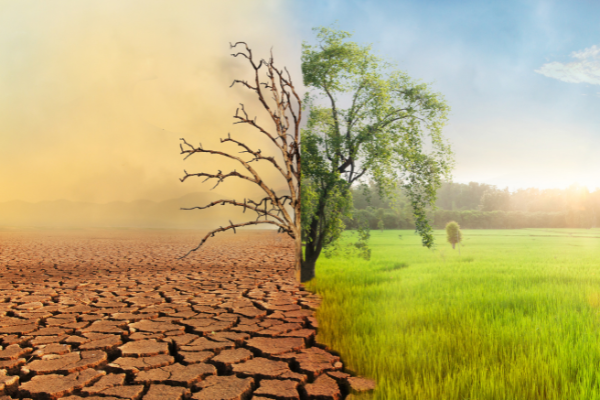









# 1. Abstract

In [1]:
#package importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.lines import Line2D


# 2. Data Importing and Cleaning
2.1 Global Temperatures


In [2]:
GlobalTemp = pd.read_csv("GlobalTemperatures.csv")
GlobalTemp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
GlobalTemp.shape

(3192, 9)

In [4]:
GlobalTemp.describe().T

,count,mean,std,min,25%,50%,75%,max
LandAverageTemperature,3180.0,8.374731,4.381310,-2.080,4.31200,8.6105,12.54825,19.021
LandAverageTemperatureUncertainty,3180.0,0.938468,1.096440,0.034,0.18675,0.3920,1.41925,7.880
LandMaxTemperature,1992.0,14.350601,4.309579,5.900,10.21200,14.7600,18.45150,21.320
LandMaxTemperatureUncertainty,1992.0,0.479782,0.583203,0.044,0.14200,0.2520,0.53900,4.373
LandMinTemperature,1992.0,2.743595,4.155835,-5.407,-1.33450,2.9495,6.77875,9.715
LandMinTemperatureUncertainty,1992.0,0.431849,0.445838,0.045,0.15500,0.2790,0.45825,3.498
LandAndOceanAverageTemperature,1992.0,15.212566,1.274093,12.475,14.04700,15.2510,16.39625,17.611
LandAndOceanAverageTemperatureUncertainty,1992.0,0.128532,0.073587,0.042,0.06300,0.1220,0.15100,0.457


In [5]:
GlobalTemp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [6]:
GlobalTemp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [7]:
#Dropping the unneccessary columns for our analysis
GlobalTemp.drop(['LandAverageTemperatureUncertainty','LandMaxTemperatureUncertainty','LandMinTemperatureUncertainty',
                 'LandAndOceanAverageTemperatureUncertainty'], axis = 1, inplace=True)

In [8]:
#Dropping any duplicate values
GlobalTemp.drop_duplicates()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,3.034,NaN,NaN,NaN
1,1750-02-01,3.083,NaN,NaN,NaN
2,1750-03-01,5.626,NaN,NaN,NaN
3,1750-04-01,8.490,NaN,NaN,NaN
4,1750-05-01,11.573,NaN,NaN,NaN
...,...,...,...,...,...
3187,2015-08-01,14.755,20.699,9.005,17.589
3188,2015-09-01,12.999,18.845,7.199,17.049
3189,2015-10-01,10.801,16.450,5.232,16.290
3190,2015-11-01,7.433,12.892,2.157,15.252


In [9]:
#Checking for null values in our data sets
GlobalTemp.isnull().sum()

dt                                   0
LandAverageTemperature              12
LandMaxTemperature                1200
LandMinTemperature                1200
LandAndOceanAverageTemperature    1200
dtype: int64

In [10]:
#filling in null values with the mean of their respective columns, then checking to ensure changes have been applied
GlobalTemp['LandAverageTemperature'] = GlobalTemp['LandAverageTemperature'].fillna(GlobalTemp['LandAverageTemperature'].mean())
GlobalTemp['LandMaxTemperature'] = GlobalTemp['LandMaxTemperature'].fillna(GlobalTemp['LandMaxTemperature'].mean())
GlobalTemp['LandMinTemperature'] = GlobalTemp['LandMinTemperature'].fillna(GlobalTemp['LandMinTemperature'].mean())
GlobalTemp['LandAndOceanAverageTemperature'] = GlobalTemp['LandAndOceanAverageTemperature'].fillna(GlobalTemp['LandAndOceanAverageTemperature'].mean())
GlobalTemp.isnull().sum()

dt                                0
LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
dtype: int64

2.2 City Temperatures

In [11]:
Natural_Disasters = pd.read_csv("1900_2021_DISASTERS.csv")
Natural_Disasters.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages (000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


In [12]:
Natural_Disasters.shape

(16126, 45)

In [13]:
Natural_Disasters.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,16126.0,1996.764790,2.015906e+01,1900.000000,1989.000000,2001.000000,2011.000000,2021.0
Seq,16126.0,714.784820,1.929635e+03,1.000000,93.000000,270.000000,486.000000,9881.0
Aid Contribution,677.0,125413.611521,2.997875e+06,1.000000,175.000000,721.000000,3511.000000,78000000.0
Dis Mag Value,4946.0,47350.380307,3.094242e+05,-57.000000,7.000000,151.500000,11296.500000,13025874.0
Start Year,16126.0,1996.778370,2.015571e+01,1900.000000,1989.000000,2001.000000,2011.000000,2021.0
Start Month,15739.0,6.444374,3.393965e+00,1.000000,4.000000,7.000000,9.000000,12.0
Start Day,12498.0,15.233957,8.953821e+00,1.000000,7.000000,15.000000,23.000000,31.0
End Year,16126.0,1996.835607,2.014301e+01,1900.000000,1989.000000,2001.000000,2011.000000,2021.0
End Month,15418.0,6.576728,3.352965e+00,1.000000,4.000000,7.000000,9.000000,12.0
End Day,12570.0,15.775020,8.865486e+00,1.000000,8.000000,16.000000,23.000000,31.0


In [14]:
Natural_Disasters.columns

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages (000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [15]:
Natural_Disasters.dtypes

Year                            int64
Seq                             int64
Glide                          object
Disaster Group                 object
Disaster Subgroup              object
Disaster Type                  object
Disaster Subtype               object
Disaster Subsubtype            object
Event Name                     object
Country                        object
ISO                            object
Region                         object
Continent                      object
Location                       object
Origin                         object
Associated Dis                 object
Associated Dis2                object
OFDA Response                  object
Appeal                         object
Declaration                    object
Aid Contribution              float64
Dis Mag Value                 float64
Dis Mag Scale                  object
Latitude                       object
Longitude                      object
Local Time                     object
River Basin 

In [16]:
#Dropping any duplicate values
Natural_Disasters.drop_duplicates()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages (000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [17]:
#This dataset had a lot of columns so instead of dropping unneccessary columns I turn the data frame into a subset of the columns that will be useful for analysis
Natural_Disasters = Natural_Disasters[['Year','Disaster Subgroup','Disaster Type','Country','Region','Continent','Start Month','Total Deaths','Total Affected','Total Damages (000 US$)']]


In [18]:
#Checking for null values in our data sets
Natural_Disasters.isnull().sum()

Year                           0
Disaster Subgroup              0
Disaster Type                  0
Country                        0
Region                         0
Continent                      0
Start Month                  387
Total Deaths                4713
Total Affected              4509
Total Damages (000 US$)    10881
dtype: int64

In [19]:
#filling in null values with the mean of their respective columns, then checking to ensure changes have been applied
Natural_Disasters['Total Deaths'] = Natural_Disasters['Total Deaths'].fillna(Natural_Disasters['Total Deaths'].mean())
Natural_Disasters['Total Affected'] = Natural_Disasters['Total Affected'].fillna(Natural_Disasters['Total Affected'].mean())
Natural_Disasters['Total Damages (000 US$)'] = Natural_Disasters['Total Damages (000 US$)'].fillna(Natural_Disasters['Total Damages (000 US$)'].mean())

#Month is an unusual one, I cannot give the mean value as this will return a float but cannot I use the mode instead as the missing values occur mainly in the biggest disasters in terms
# of death toll, to get around this I fill it with random values betweem 1 and 12 as it only make up 2% of the data
random_months = np.random.uniform(1, 12, size=387)
Natural_Disasters.loc[Natural_Disasters['Start Month'].isnull(), 'Start Month'] = random_months
Natural_Disasters.isnull().sum()


Year                       0
Disaster Subgroup          0
Disaster Type              0
Country                    0
Region                     0
Continent                  0
Start Month                0
Total Deaths               0
Total Affected             0
Total Damages (000 US$)    0
dtype: int64

2.3 CO2 emissions


In [20]:
CO2 = pd.read_csv("co2_emissions_kt_by_country.csv")
CO2.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [21]:
#renaming the value column to co2 emissions(kilotons), renaming the country_name column to country in order to merge this data frame with CityTemp
CO2.rename(columns = {'value':'co2 emissions(kilotons)'}, inplace = True)
CO2.rename(columns = {'country_name':'Country'}, inplace = True)

In [22]:
CO2.shape

(13953, 4)

In [23]:
CO2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13953.0,1990.732316,1.718758e+01,1960.000,1976.0,1992.0,2006.000,2.019000e+03
co2 emissions(kilotons),13953.0,825498.343354,2.788923e+06,-80.674,1100.0,13900.0,164277.933,3.434401e+07


In [24]:
CO2.columns

Index(['country_code', 'Country', 'year', 'co2 emissions(kilotons)'], dtype='object')

In [25]:
CO2.dtypes

country_code                object
Country                     object
year                         int64
co2 emissions(kilotons)    float64
dtype: object

In [26]:
#Dropping any duplicate values
CO2.drop_duplicates()

,country_code,Country,year,co2 emissions(kilotons)
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


In [27]:
#Checking for null values in our data sets
CO2.isnull().sum()

country_code               0
Country                    0
year                       0
co2 emissions(kilotons)    0
dtype: int64

2.4 Merging datasets

In [28]:
#In order to gain better insights I merged the CO2 and global temp data frames with an inner join
GlobalTemp['year'] = pd.DatetimeIndex(GlobalTemp['dt']).year
CO2_Temp = pd.merge(GlobalTemp,CO2, on=['year'])

In [29]:
#The resulting data set is extremely large and our co2 emissions data starts from 1960 so I filtered out records from before 1960
years = CO2_Temp['year']
years2 = years >= 1960
CO2_Temp = CO2_Temp[years2]


# 3. Analysis and Insights
3.1 CO2_Temp

3.1.1 CO2 emissions over time

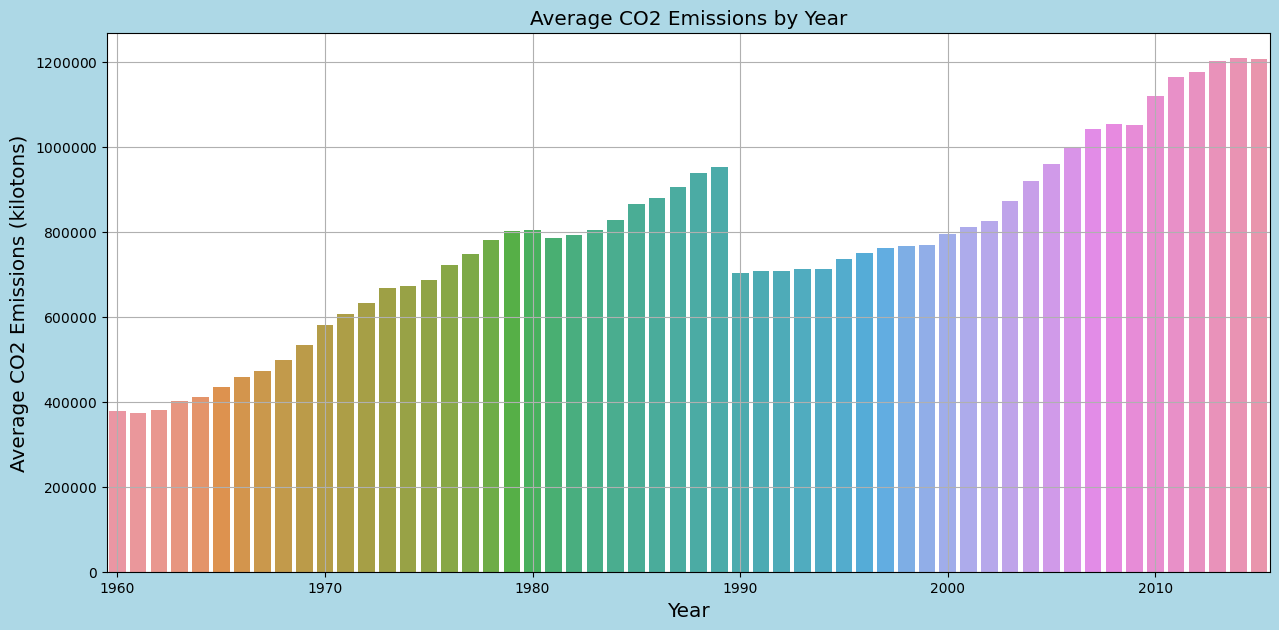

In [30]:
#I decided to set the face colour to light blue for all of the plots, the colour makes the graph more engaging and focuses the eyes of viewers
plt.figure(figsize=(15, 7),facecolor='lightblue')

#groups the data set by year as an index with the average co2 emissions mean as values
avg_emissions_per_year = CO2_Temp.groupby('year')['co2 emissions(kilotons)'].mean().reset_index()
sns.barplot(data=avg_emissions_per_year, x='year', y='co2 emissions(kilotons)')
plt.title("Average CO2 Emissions by Year", size="x-large")
plt.xlabel("Year", size="x-large")
plt.ylabel("Average CO2 Emissions (kilotons)", size="x-large")
plt.grid()
ax = plt.gca()

ax.xaxis.set_major_locator(MultipleLocator(10))

# Set y-axis tick labels to display whole numbers
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)

plt.show()

3.1.2
CO2 emissions by top polluters



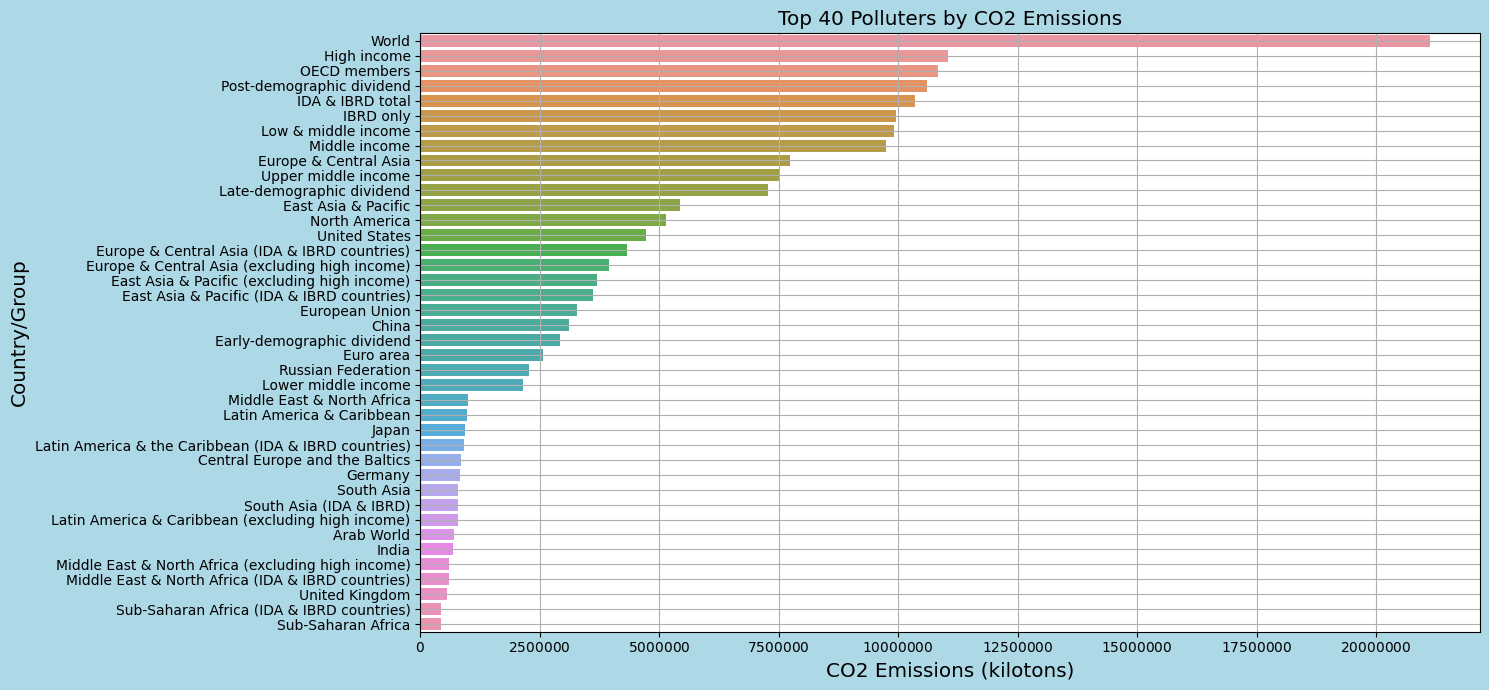

In [31]:
plt.figure(figsize=(15, 7),facecolor='lightblue')

# Sort the DataFrame by co2 emissions
avg_emissions_per_country = CO2_Temp.groupby('Country')['co2 emissions(kilotons)'].mean().reset_index()
sorted_data = avg_emissions_per_country.sort_values('co2 emissions(kilotons)', ascending=False)

# Select the top 40 polluter groups
top_40 = sorted_data.head(40)

ax = sns.barplot(data=top_40, x='co2 emissions(kilotons)', y='Country')
plt.title("Top 40 Polluters by CO2 Emissions", size="x-large")
plt.xlabel("CO2 Emissions (kilotons)", size="x-large")
plt.ylabel("Country/Group", size="x-large")
plt.grid()

# Set y-axis tick labels to display whole numbers
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.xaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()

3.1.3
 Temperature increase over time

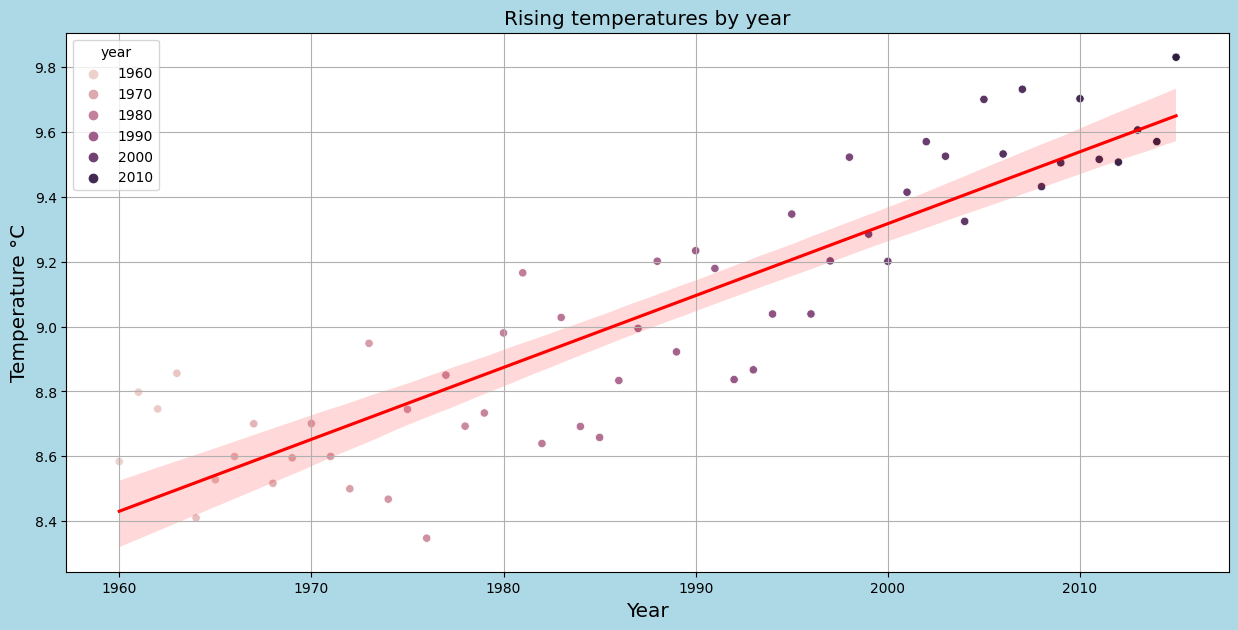

In [32]:

plt.figure(figsize=(15, 7), facecolor='lightblue')

#numpy mean is more complex than necessary but included to demonstrate I could use numpy functions if desired
temp_over_time = CO2_Temp.groupby(['year'])['LandAverageTemperature'].agg(np.mean).reset_index()
sns.scatterplot(data=temp_over_time, x='year', y='LandAverageTemperature', hue='year')

# Adding line of best fit to the plot to show trend
sns.regplot(data=temp_over_time, x='year', y='LandAverageTemperature', scatter=False, color='red')

plt.title("Rising temperatures by year", size="x-large")
plt.xlabel("Year", size="x-large")
plt.ylabel("Temperature °C", size="x-large")

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(10))

plt.grid()
plt.show()

3.2 Natural Disasters

3.2.1 Distribution of natural disasters occurrences

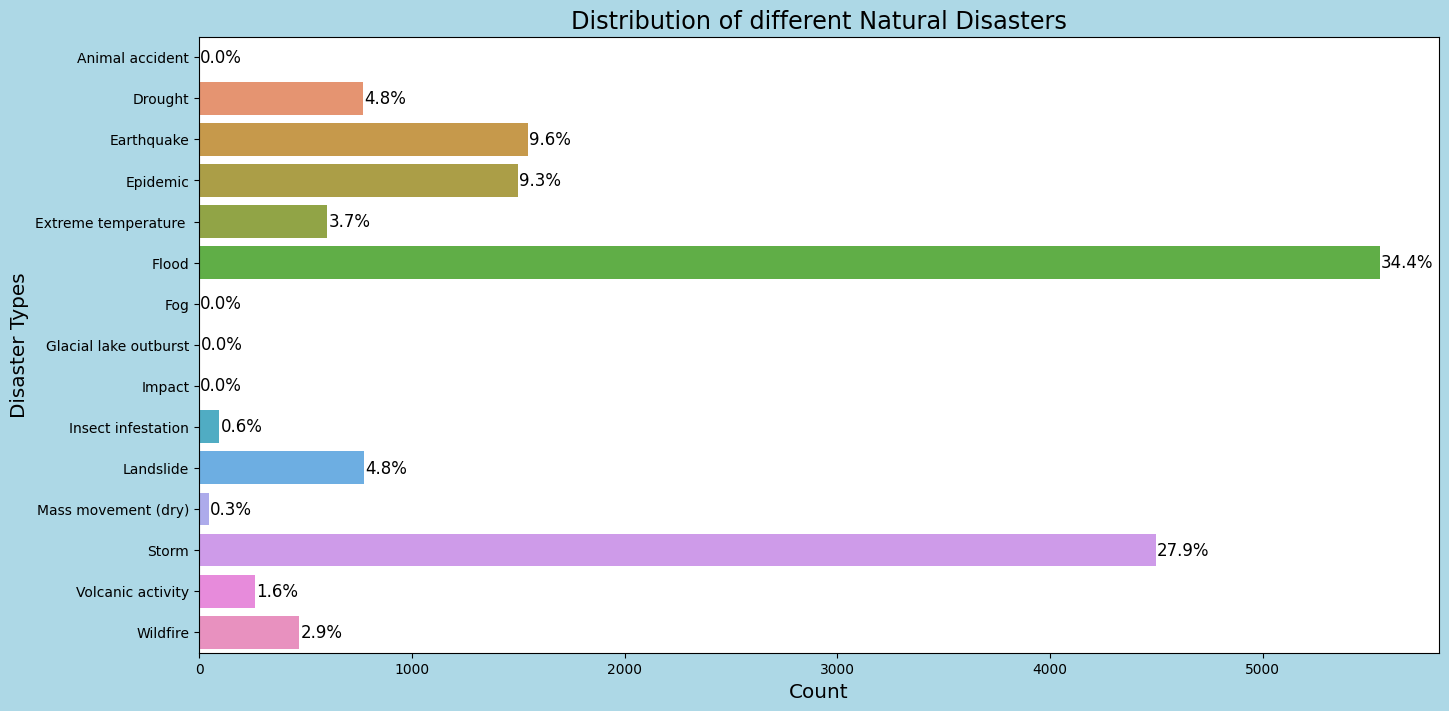

In [33]:
disaster_types_by_distribution = Natural_Disasters['Disaster Type'].value_counts().sort_index()

plt.figure(figsize=(16, 8),facecolor='lightblue')
ax = sns.barplot(x=disaster_types_by_distribution.values, y=disaster_types_by_distribution.index)

total_count = disaster_types_by_distribution.sum()

#loop to calculate the percentage of the total made up by each disaster type and then add the percentage value as a label
for i, v in enumerate(disaster_types_by_distribution.values):
    percentage = (v / total_count) * 100
    ax.text(v + 5, i, f'{percentage:.1f}%', va='center', fontsize='large')

plt.title("Distribution of different Natural Disasters", size="xx-large")
plt.xlabel("Count", size="x-large")
plt.ylabel("Disaster Types", size="x-large")
plt.show()

3.2.2 Count of different natural disasters by year




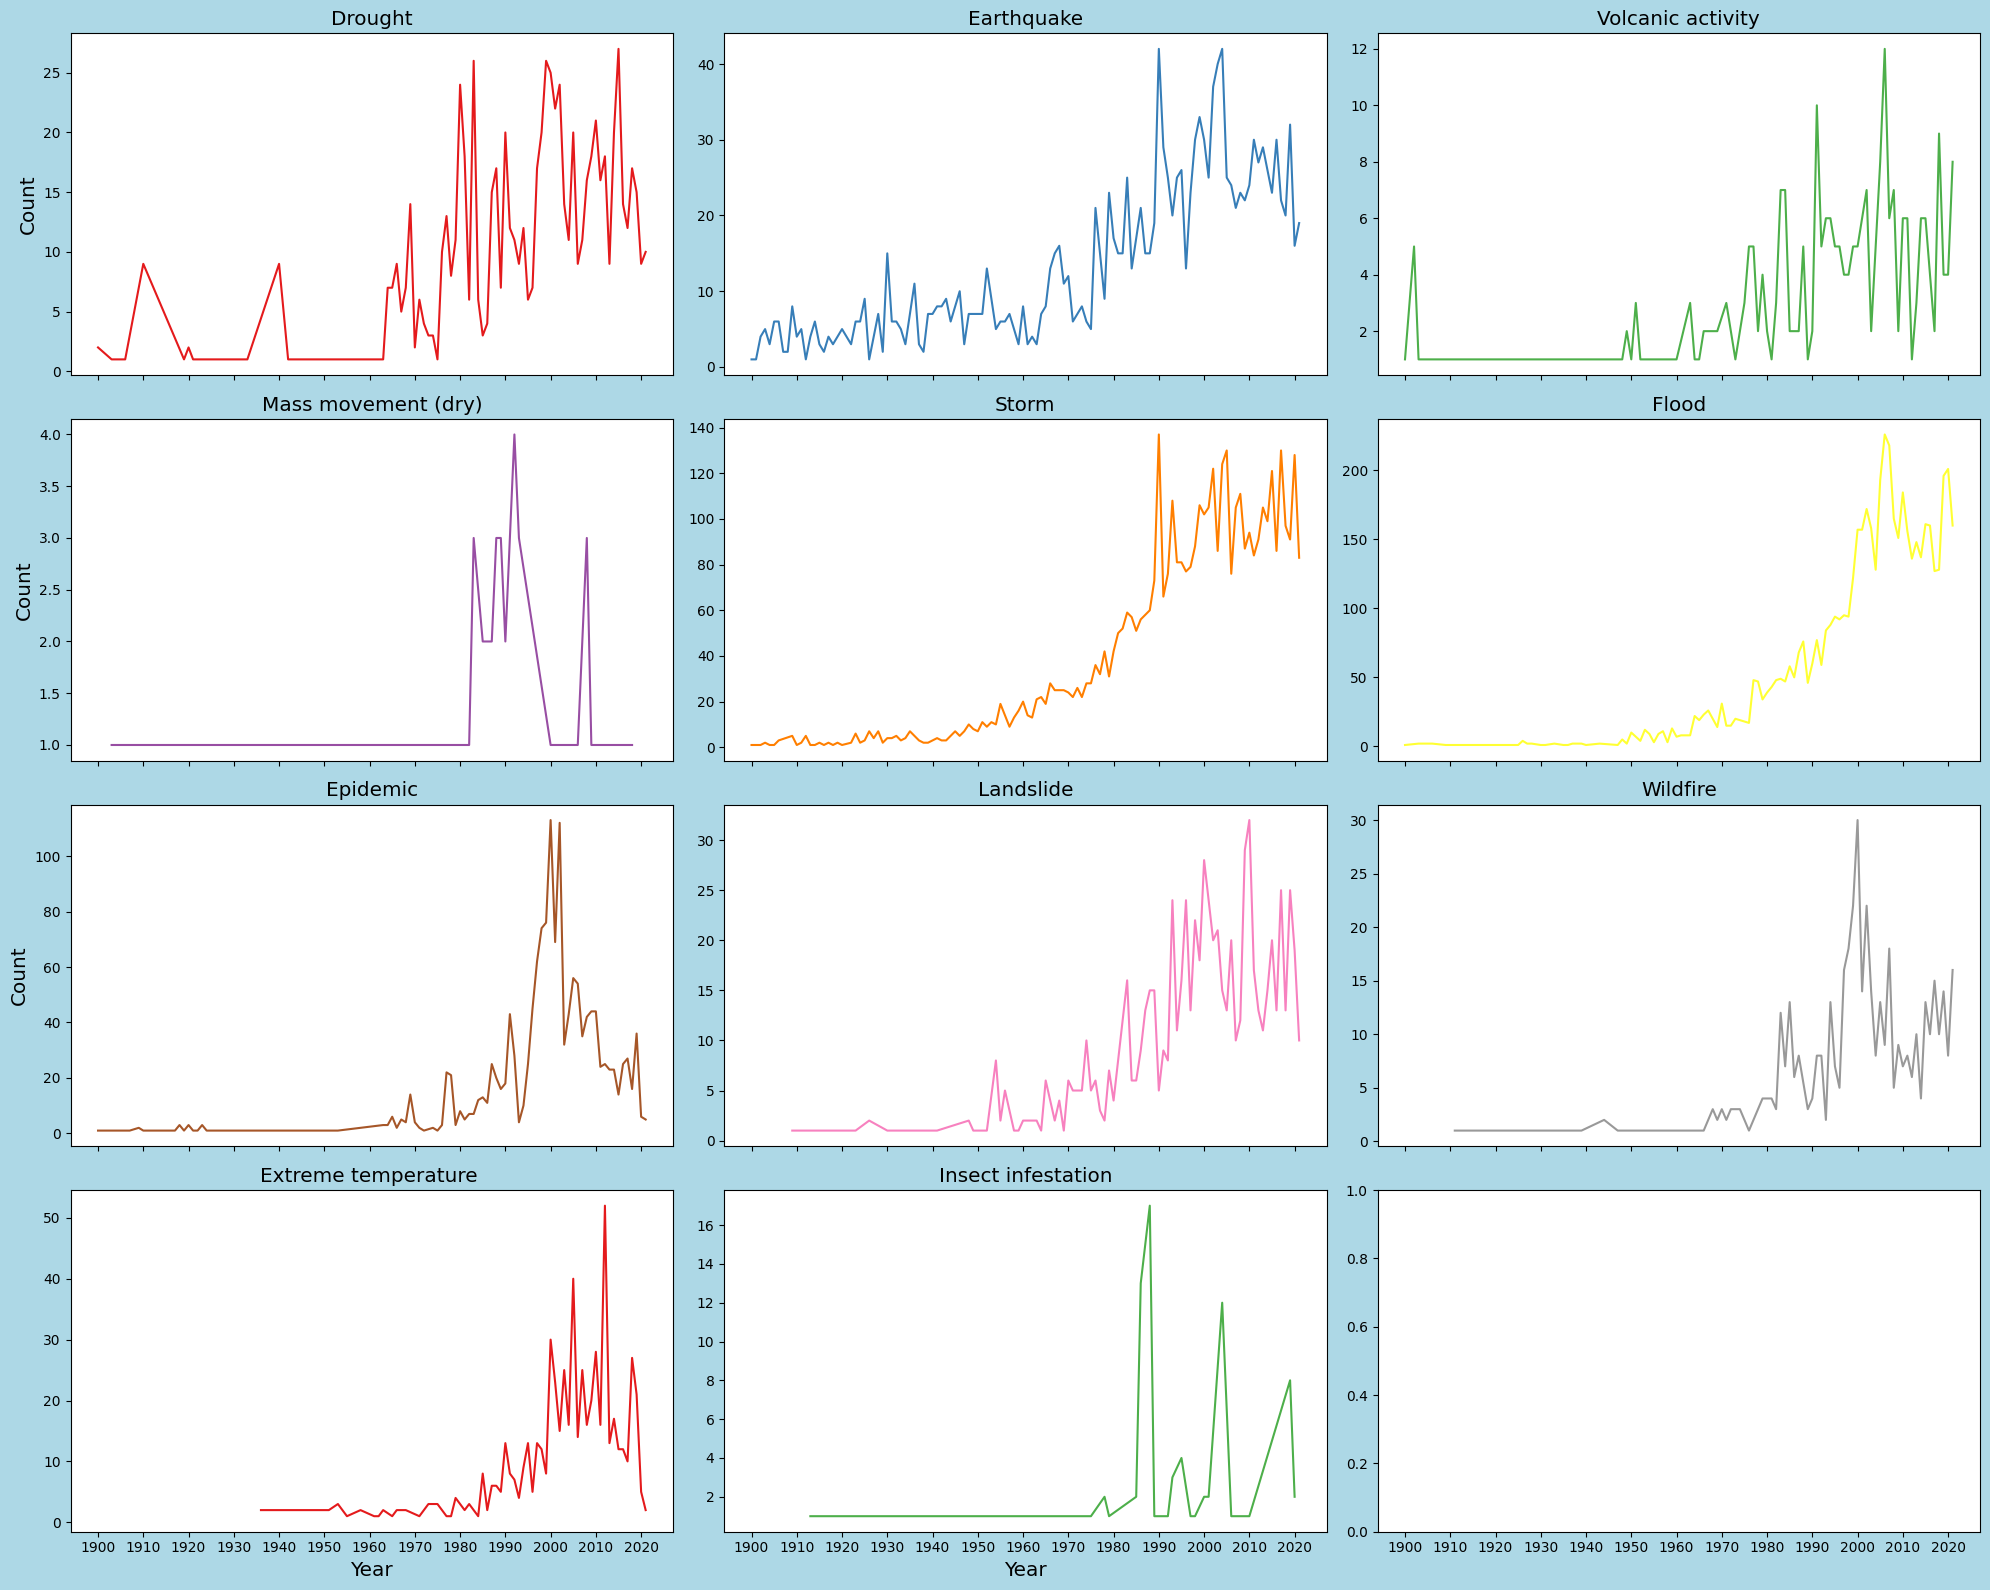

In [34]:
disaster_types = Natural_Disasters['Disaster Type'].unique()
colours = sns.color_palette("Set1", len(disaster_types))

#Created custom function that takes in a list of disaster_types and a list of colours as arguments and creates a subplot for each element
def plot_disaster_types(disaster_types, colors):
    fig, ax = plt.subplots(4, 3, figsize=(20, 16), facecolor='lightblue', sharex=True)
    ax = ax.flat
    i = 0

    for x, color in zip(disaster_types, colors):
        data = Natural_Disasters[Natural_Disasters['Disaster Type'] == x]
        counts = data.groupby('Year').size().reset_index(name='Counts')

        # Check if there are more than 2 data points, 4 of the disaster types have 2 or less data points making them useless for analysis
        # 1 empty subplot will remain (subplot 4,3) which cannot be removed in order to show x axis labels for column 3
        if len(counts) > 2:
            sns.lineplot(data=counts, x='Year', y='Counts', ax=ax[i], color=color)
            ax[i].set_title(x, size='x-large')
            ax[i].set_xlabel("Year", size='x-large')
            x_ticks = np.arange(Natural_Disasters['Year'].min(), Natural_Disasters['Year'].max() + 1, 10)
            ax[i].set_xticks(x_ticks)

            if i == 0 or i == 3 or i == 6:
                ax[i].set_ylabel("Count", size='x-large')
            else:
                ax[i].set_ylabel("")

            i += 1

    plt.tight_layout()
    plt.show()

#Calling custom function
plot_disaster_types(disaster_types, colours)

3.2.3 Disaster occurrences, temperature rise correlation




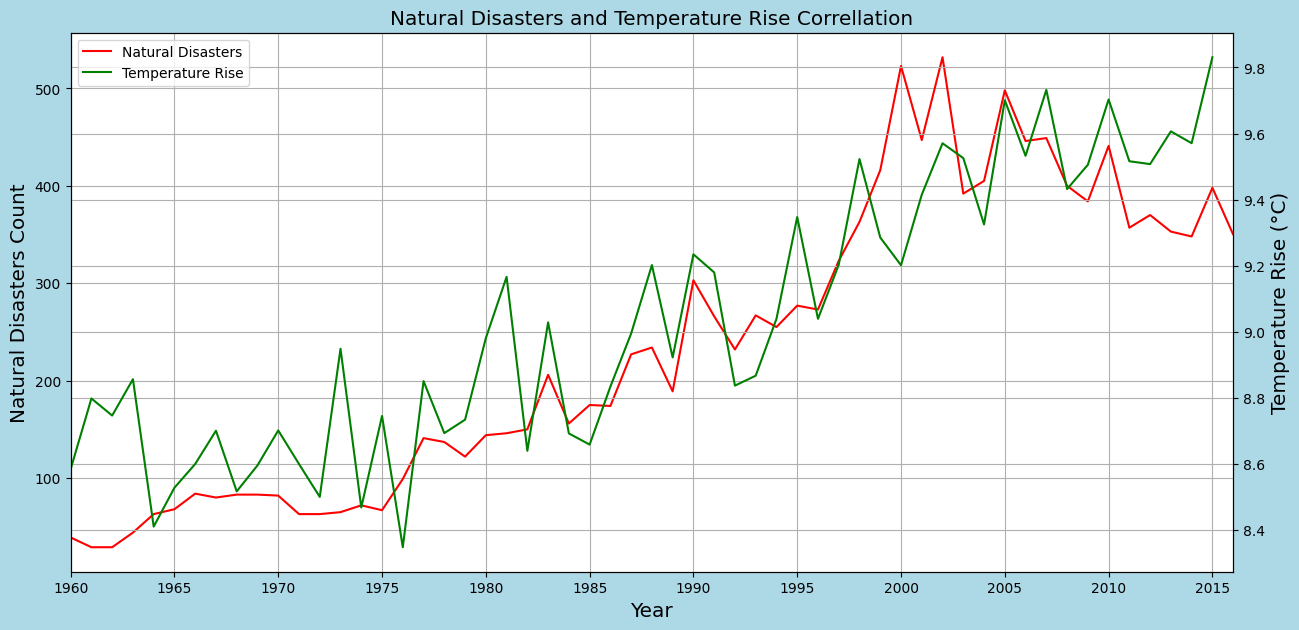

In [35]:
fig, ax1 = plt.subplots(figsize=(15, 7),facecolor='lightblue')

# Natural disaster count by year
avg_disasters_per_year = Natural_Disasters['Year'].value_counts().sort_index()
# Filter by starting year
avg_disasters_per_year = avg_disasters_per_year[avg_disasters_per_year.index >= 1960]

ax1.plot(avg_disasters_per_year.index, avg_disasters_per_year.values, color='red', label='Natural Disasters')
ax1.set_title("Natural Disasters and Temperature Rise Correllation", size="x-large")
ax1.set_xlabel("Year", size="x-large")
ax1.set_ylabel("Natural Disasters Count", size="x-large")
ax1.grid()

# Temperature rise by year
temp_over_time = CO2_Temp.groupby(['year'])['LandAverageTemperature'].mean().reset_index()
temp_over_time = temp_over_time[temp_over_time['year'] >= 1960]  # Filter by starting year

ax2 = ax1.twinx()
ax2.plot(temp_over_time['year'], temp_over_time['LandAverageTemperature'], color='green', label='Temperature Rise')
ax2.set_ylabel("Temperature Rise (°C)", size="x-large")

# Create a single legend for both line plots
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2

legend = plt.legend(handles, labels, loc='upper left')

plt.xlim(1960, 2016)
plt.xticks(range(1960, 2016, 5))
plt.grid()

plt.show()

3.2.4 CO2 Emissions and Natural Disasters Correlation

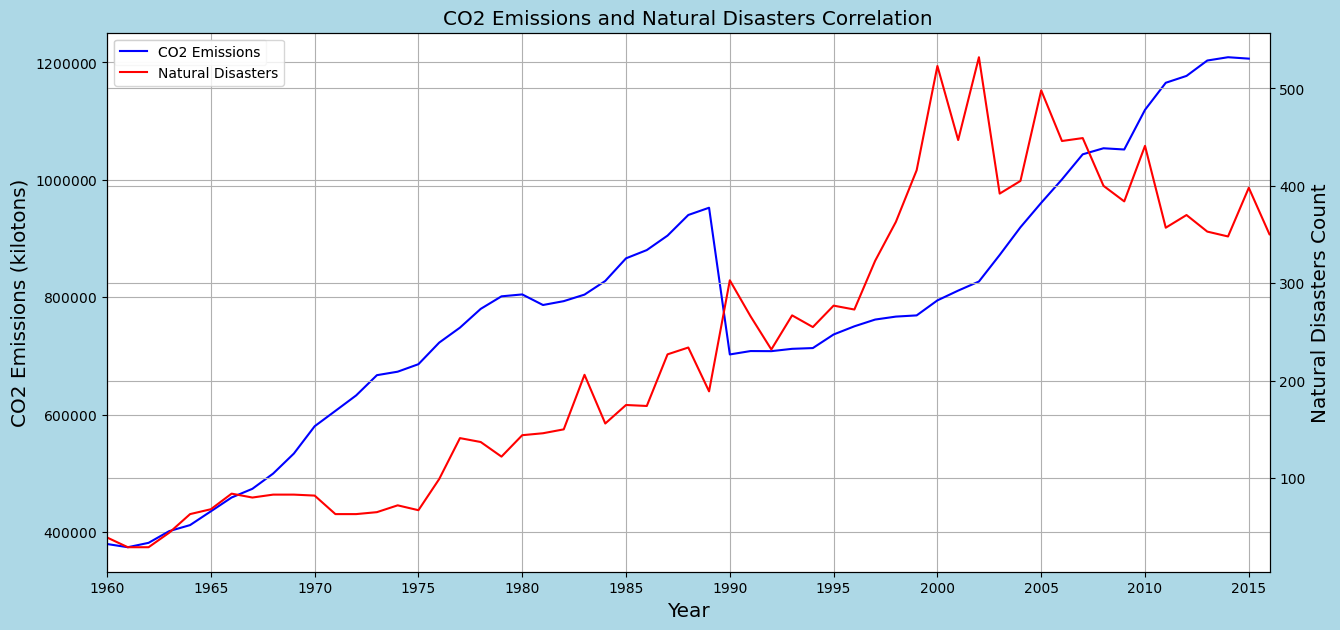

In [36]:
fig, ax1 = plt.subplots(figsize=(15, 7),facecolor='lightblue')

# CO2 emissions by year
avg_emissions_per_year = CO2_Temp.groupby('year')['co2 emissions(kilotons)'].mean().reset_index()
# Filter by starting year
avg_emissions_per_year = avg_emissions_per_year[avg_emissions_per_year['year'] >= 1960]

sns.lineplot(data=avg_emissions_per_year, x='year', y='co2 emissions(kilotons)', ax=ax1, color='blue', label='CO2 Emissions')
ax1.set_title("CO2 Emissions and Natural Disasters Correlation", size="x-large")
ax1.set_xlabel("Year", size="x-large")
ax1.set_ylabel("CO2 Emissions (kilotons)", size="x-large")
ax1.grid()

# Natural disaster count by year
avg_disasters_per_year = Natural_Disasters['Year'].value_counts().sort_index()
# Filter by starting year
avg_disasters_per_year = avg_disasters_per_year[avg_disasters_per_year.index >= 1960]

ax2 = ax1.twinx()
sns.lineplot(x=avg_disasters_per_year.index, y=avg_disasters_per_year.values, ax=ax2, color='red', label='Natural Disasters')
ax2.set_ylabel("Natural Disasters Count", size="x-large")

# Create a single legend for both line plots
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2

legend = plt.legend(handles, labels, loc='upper left')

plt.xlim(1960, 2016)
plt.xticks(range(1960, 2016, 5))
plt.grid()

ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.yaxis.get_major_formatter().set_scientific(False)

plt.show()